In [1]:
% matplotlib inline
# 如若要在jupyter  notebook中使用matplotlib，运行的第一行代码必须为
# 可以解决一些画图不兼容问题

# TensorFlow 线性回归

In [2]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from six.moves import xrange

拟合y = 2*x + 0.1<br>

In [3]:
# 生成数据
import numpy as np

x_data = np.linspace(start=-1, stop=1, num=50)

# x表示输入，y表示输出，y_表示y(hat)预测值
# 噪声～正态分布，服从均值为0，方差为0.2
y_data = 2 * x_data + 0.1
y_data_noise = y_data + np.random.normal(loc=0, scale=0.2, size=x_data.shape)

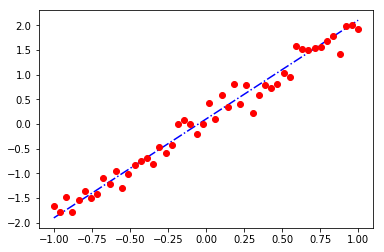

In [4]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'b-.')
plt.plot(x_data, y_data_noise, 'ro')
plt.show()

利用tensorflow完成拟合

In [5]:
# 正式的tensorflow代码风格

import tensorflow as tf

# hyper-parameter
training_episode = 10000
train_size = 50
test_size = 50
learning_rate = 0.01

# tensorflow是采用的graph（图结构）实现的——即一切计算在图内部完成。
graph = tf.Graph()
with graph.as_default():
    # tf.name_scope可以帮助我们将图内部结构变得更加系统化
    with tf.name_scope('placehold'):
        # placehold - tensorflow中的占位符，用于表示从graph外部得到的数据
        x = tf.placeholder(dtype=tf.float32, name='x')
        y = tf.placeholder(dtype=tf.float32, name='y')

    with tf.name_scope('weights'):
        # 为拟合目标函数 y=a*x+b 定义变量a和b
        weight_a = tf.Variable(tf.random_normal(shape=[1], mean=.0, stddev=.1), name='a')
        weight_b = tf.Variable(tf.zeros(shape=[1]), name='b')

    y_ = tf.multiply(x, weight_a) + weight_b

    with tf.name_scope('loss_op'):
        loss_op = tf.reduce_mean(tf.losses.mean_squared_error(y, y_))
    with tf.name_scope('train_op'):
        train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_op)

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())

    for i in xrange(1,1+training_episode):
        feed = {
            x: x_data,
            y: y_data_noise
        }
        _, cost = session.run([train_op, loss_op], feed_dict=feed)

        if i % 1000 == 0:
            print('Epoch %s / %s: loss = %s, y = %s * x + %s' % (
                i, training_episode, cost, session.run(weight_a)[0], session.run(weight_b)[0]))
    a, b = session.run(weight_a)[0], session.run(weight_b)[0]

Epoch 1000 / 10000: loss = 0.392973, y = 0.91406 * x + 0.0748149
Epoch 2000 / 10000: loss = 0.122547, y = 1.42364 * x + 0.0849197
Epoch 3000 / 10000: loss = 0.0551023, y = 1.67818 * x + 0.0862845
Epoch 4000 / 10000: loss = 0.0382746, y = 1.80532 * x + 0.0864689
Epoch 5000 / 10000: loss = 0.0340758, y = 1.86883 * x + 0.0864935
Epoch 6000 / 10000: loss = 0.0330281, y = 1.90056 * x + 0.0864958
Epoch 7000 / 10000: loss = 0.0327667, y = 1.91641 * x + 0.0864958
Epoch 8000 / 10000: loss = 0.0327014, y = 1.92432 * x + 0.0864958
Epoch 9000 / 10000: loss = 0.0326852, y = 1.92828 * x + 0.0864958
Epoch 10000 / 10000: loss = 0.0326811, y = 1.93025 * x + 0.0864958


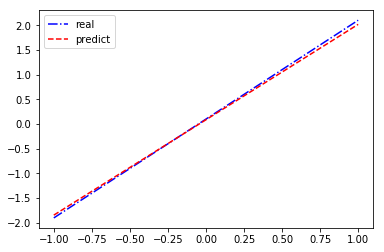

In [6]:
plt.plot(x_data, y_data, 'b-.', label='real')
plt.plot(x_data, a * x_data + b, 'r--', label='predict')
# plt.plot(x_data, y_data_noise, 'ro')
plt.legend()
plt.show()

推荐资料：<br>
[回归--wikipedia](https://en.wikipedia.org/wiki/Regression_analysis)<br>
[Stanford UFLDL课程，logistic回归（结合神经网络举例）](http://deeplearning.stanford.edu/wiki/index.php/Logistic_Regression_Vectorization_Example)<br>
[Stanford UFLDL课程，softmax回归（结合神经网络举例）](http://deeplearning.stanford.edu/wiki/index.php/Logistic_Regression_Vectorization_Example)<br>
[Stanford UFLDL课程，softmax回归例子（结合神经网络举例，matlab代码）](http://deeplearning.stanford.edu/wiki/index.php/Logistic_Regression_Vectorization_Example)<br>
[sklearn库，regression](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)<br>